ValueError: keyword ha is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_contains', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

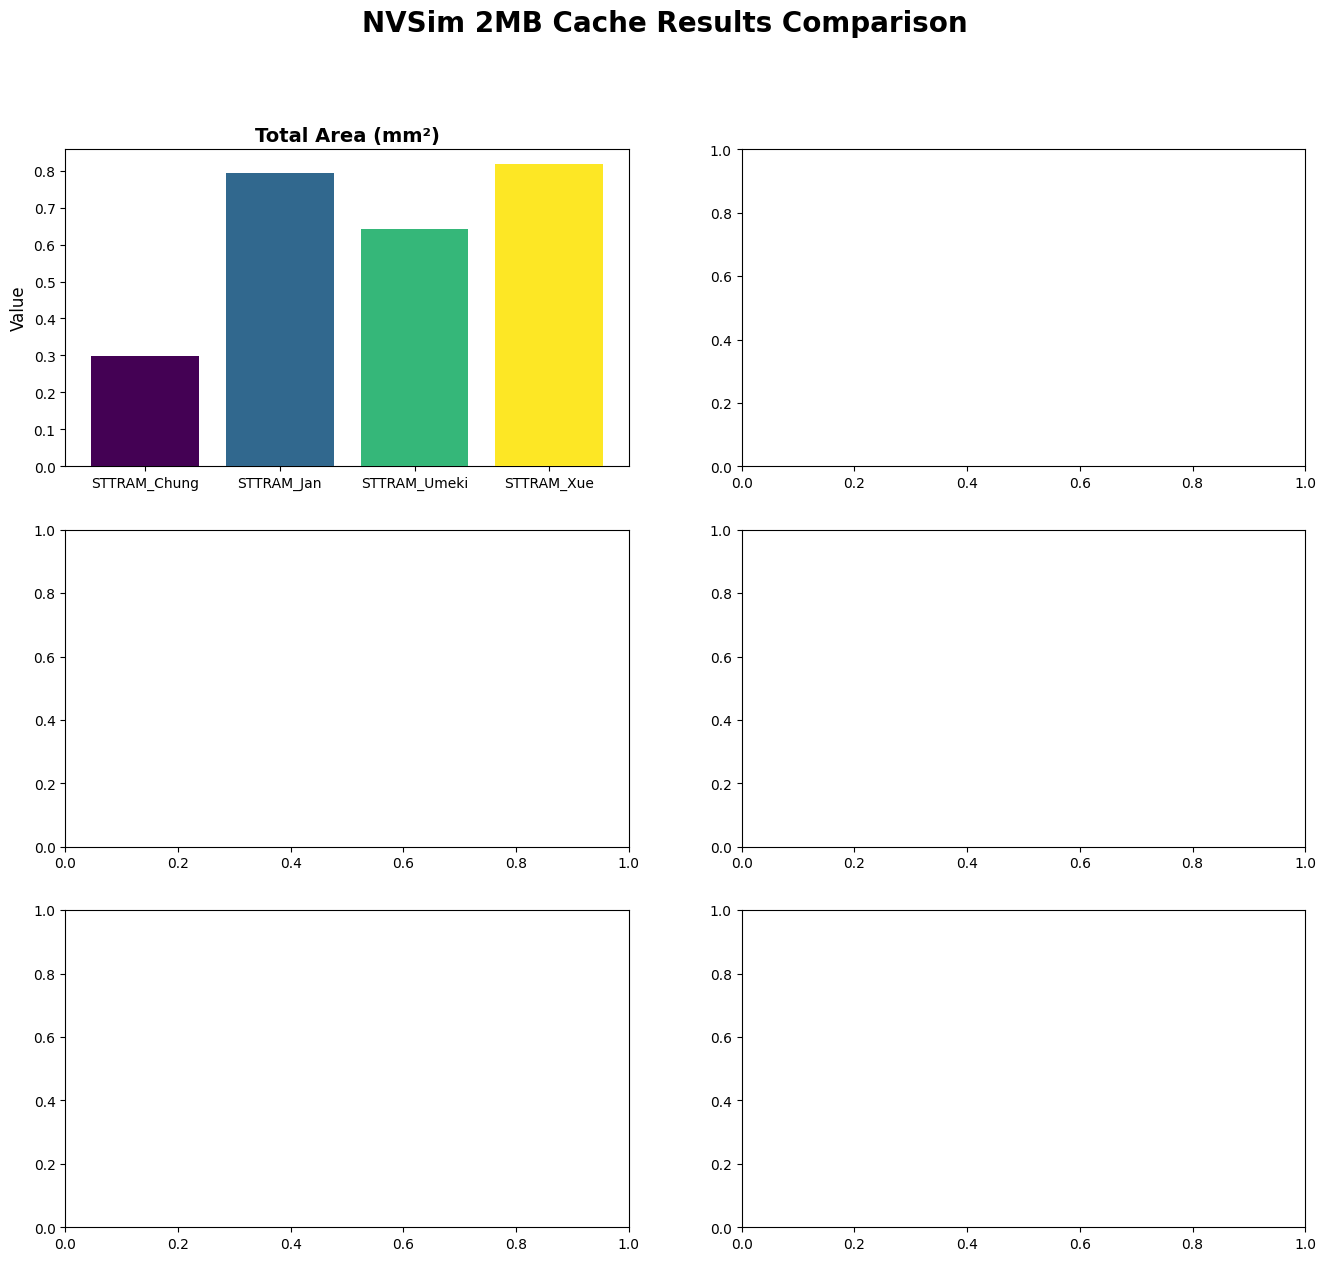

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Hardcoded NVSim Data ---
# Data from the latest 2MB cache simulation run.
# Energy values are converted from nJ to pJ for consistency.
data = {
    'Model Name': [
        'STTRAM_Chung', 'STTRAM_Jan', 'STTRAM_Umeki',
        'STTRAM_Xue'
    ],
    'Total Area (mm²)': [0.298, 0.795, 0.642, 0.817],
    'Hit Latency (ns)': [0.863, 1.067, 1.048, 1.165],
    'Write Latency (ns)': [10.340, 4.941, 10.421, 2.514],
    'Hit Energy (pJ)': [96, 157, 133, 184],
    'Write Energy (pJ)': [922, 1243, 1359, 556],
    'Leakage Power (mW)': [74.169, 145.341, 96.624, 110.864]
}
df = pd.DataFrame(data)

# --- Plotting Configuration ---
# Set up a 3x2 grid to display the 6 metrics
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle('NVSim 2MB Cache Results Comparison', fontsize=20, fontweight='bold')
axes = axes.flatten()

metrics_to_plot = [
    'Total Area (mm²)', 'Hit Latency (ns)', 'Write Latency (ns)',
    'Hit Energy (pJ)', 'Write Energy (pJ)', 'Leakage Power (mW)'
]
colors = plt.cm.get_cmap('viridis', len(df['Model Name']))

# --- Generate Plots ---
# Iterate through each metric and create a corresponding bar chart
for i, metric in enumerate(metrics_to_plot):
    ax = axes[i]
    bars = ax.bar(df['Model Name'], df[metric], color=colors.colors, zorder=3)

    # --- Formatting ---
    ax.set_title(metric, fontsize=14, fontweight='bold')
    ax.set_ylabel('Value', fontsize=12)
    ax.tick_params(axis='x', rotation=20, labelsize=10, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
    ax.set_ylim(bottom=0) # Ensure y-axis starts at 0

    # Add data labels on top of each bar for clarity
    for bar in bars:
        yval = bar.get_height()
        label = f'{yval:.3f}' if yval < 10 else f'{yval:.2f}'
        ax.text(bar.get_x() + bar.get_width()/2.0, yval, label,
                va='bottom', ha='center', fontsize=9, fontweight='bold')

# --- Final Adjustments & Display ---
# Remove the unused subplot if the number of metrics is odd
if len(metrics_to_plot) < len(axes):
    for i in range(len(metrics_to_plot), len(axes)):
        fig.delaxes(axes[i])

# Adjust layout to prevent titles and labels from overlapping
fig.tight_layout(rect=[0, 0, 1, 0.96])

# Display the final plot window
plt.show()